In [1]:
import ibmos2spark

## HIDDEN CREDENTIALS

from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
# Please read the documentation of PySpark to learn more about the possibilities to load data files.
# PySpark documentation: https://spark.apache.org/docs/2.0.1/api/python/pyspark.sql.html#pyspark.sql.SparkSession
# The SparkSession object is already initialized for you.
# The following variable contains the path to your file on your IBM Cloud Object Storage.
hello_file = cos.url('hello.txt', 'cs340spring20184b12f92a8d204278af3959660617b691')


In [2]:
rdd = sc.textFile(hello_file)

In [3]:
rdd.collect()

['hello', 'world', 'I', 'am', 'ahmed']

In [4]:
rdd.count()

5

In [5]:
s = "heloo"

In [6]:
rdd.map(lambda x: (x, len(x)-len(x.replace("h","")))).reduce(lambda x,y : x+y)

('hello', 1, 'world', 0, 'I', 0, 'am', 0, 'ahmed', 1)

# Let's get started!

In [7]:
books = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('books.csv', 'cs340spring20184b12f92a8d204278af3959660617b691'))
books.take(5)


[Row(id='1', book_id='2767052', best_book_id='2767052', work_id='2792775', books_count='272', isbn='439023483', isbn13='9.78043902348e+12', authors='Suzanne Collins', original_publication_year='2008.0', original_title='The Hunger Games', title='The Hunger Games (The Hunger Games, #1)', language_code='eng', average_rating='4.34', ratings_count='4780653', work_ratings_count='4942365', work_text_reviews_count='155254', ratings_1='66715', ratings_2='127936', ratings_3='560092', ratings_4='1481305', ratings_5='2706317', image_url='https://images.gr-assets.com/books/1447303603m/2767052.jpg', small_image_url='https://images.gr-assets.com/books/1447303603s/2767052.jpg'),
 Row(id='2', book_id='3', best_book_id='3', work_id='4640799', books_count='491', isbn='439554934', isbn13='9.78043955493e+12', authors='J.K. Rowling, Mary GrandPré', original_publication_year='1997.0', original_title="Harry Potter and the Philosopher's Stone", title="Harry Potter and the Sorcerer's Stone (Harry Potter, #1)", 

In [8]:
books.show()

+---+--------+------------+--------+-----------+----------+-----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------------------+--------------------+
| id| book_id|best_book_id| work_id|books_count|      isbn|           isbn13|             authors|original_publication_year|      original_title|               title|language_code|average_rating|ratings_count|work_ratings_count|work_text_reviews_count|ratings_1|ratings_2|ratings_3|ratings_4|ratings_5|           image_url|     small_image_url|
+---+--------+------------+--------+-----------+----------+-----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------

In [9]:
books.columns

['id',
 'book_id',
 'best_book_id',
 'work_id',
 'books_count',
 'isbn',
 'isbn13',
 'authors',
 'original_publication_year',
 'original_title',
 'title',
 'language_code',
 'average_rating',
 'ratings_count',
 'work_ratings_count',
 'work_text_reviews_count',
 'ratings_1',
 'ratings_2',
 'ratings_3',
 'ratings_4',
 'ratings_5',
 'image_url',
 'small_image_url']

In [10]:
books.select(["id","book_id","isbn","original_title","language_code","average_rating"]).show()

+---+--------+----------+--------------------+-------------+--------------+
| id| book_id|      isbn|      original_title|language_code|average_rating|
+---+--------+----------+--------------------+-------------+--------------+
|  1| 2767052| 439023483|    The Hunger Games|          eng|          4.34|
|  2|       3| 439554934|Harry Potter and ...|          eng|          4.44|
|  3|   41865| 316015849|            Twilight|        en-US|          3.57|
|  4|    2657|  61120081|To Kill a Mocking...|          eng|          4.25|
|  5|    4671| 743273567|    The Great Gatsby|          eng|          3.89|
|  6|11870085| 525478817|The Fault in Our ...|          eng|          4.26|
|  7|    5907| 618260307|The Hobbit or The...|        en-US|          4.25|
|  8|    5107| 316769177|The Catcher in th...|          eng|          3.79|
|  9|     960|1416524797|    Angels & Demons |        en-CA|          3.85|
| 10|    1885| 679783261| Pride and Prejudice|          eng|          4.24|
| 11|   7720

# Let's get the average rating per tag

In [11]:
book_tags = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('book_tags.csv', 'cs340spring20184b12f92a8d204278af3959660617b691'))
book_tags.columns


['goodreads_book_id', 'tag_id', 'count']

In [12]:
book_tags.show()

+-----------------+------+------+
|goodreads_book_id|tag_id| count|
+-----------------+------+------+
|                1| 30574|167697|
|                1| 11305| 37174|
|                1| 11557| 34173|
|                1|  8717| 12986|
|                1| 33114| 12716|
|                1| 11743|  9954|
|                1| 14017|  7169|
|                1|  5207|  6221|
|                1| 22743|  4974|
|                1| 32989|  4364|
|                1| 27199|  3857|
|                1| 11590|  3456|
|                1| 18886|  3374|
|                1|  6953|  2408|
|                1| 22753|  1881|
|                1| 24960|  1821|
|                1|  1691|  1742|
|                1|  6857|  1560|
|                1| 15965|  1309|
|                1|  6888|  1095|
+-----------------+------+------+
only showing top 20 rows



In [14]:
tags_ratings = books.join(book_tags, books['book_id']==book_tags['goodreads_book_id']).select(["book_id","tag_id","average_rating","language_code"])
tags_ratings.show()

+-------+------+--------------+-------------+
|book_id|tag_id|average_rating|language_code|
+-------+------+--------------+-------------+
|      1| 30574|          4.54|          eng|
|      1| 11305|          4.54|          eng|
|      1| 11557|          4.54|          eng|
|      1|  8717|          4.54|          eng|
|      1| 33114|          4.54|          eng|
|      1| 11743|          4.54|          eng|
|      1| 14017|          4.54|          eng|
|      1|  5207|          4.54|          eng|
|      1| 22743|          4.54|          eng|
|      1| 32989|          4.54|          eng|
|      1| 27199|          4.54|          eng|
|      1| 11590|          4.54|          eng|
|      1| 18886|          4.54|          eng|
|      1|  6953|          4.54|          eng|
|      1| 22753|          4.54|          eng|
|      1| 24960|          4.54|          eng|
|      1|  1691|          4.54|          eng|
|      1|  6857|          4.54|          eng|
|      1| 15965|          4.54|   

In [15]:
book_tags.count()

999912

In [16]:
grouped_tags = tags_ratings.groupBy("tag_id")

In [17]:
grouped_tags.count().show()

+------+-----+
|tag_id|count|
+------+-----+
| 19132|   14|
|   829|  559|
| 18130|  412|
| 19095|    7|
| 22254|    1|
| 23097|    2|
|  2136|  588|
| 31713|   13|
|  2294|  200|
| 32812|  214|
| 28839|   71|
| 13865|   52|
|  2904|   12|
|  7273|   13|
| 27248|   16|
|  8304|   25|
| 27264|    6|
| 29089|   26|
| 21249|   18|
|  9009|    5|
+------+-----+
only showing top 20 rows



In [18]:
grouped_tags.avg("average_rating")

AnalysisException: '"average_rating" is not a numeric column. Aggregation function can only be applied on a numeric column.;'

# "average_rating" is not a numeric column.
## Aggregation function can only be applied on a numeric column.

In [19]:
tags_ratings.printSchema()

root
 |-- book_id: string (nullable = true)
 |-- tag_id: string (nullable = true)
 |-- average_rating: string (nullable = true)
 |-- language_code: string (nullable = true)



# Cast
<img src='https://preview.ibb.co/iq7s1c/s26c_Z1523345891.jpg'>

In [20]:
average_rating_num = tags_ratings.average_rating.cast('float')
tags_ratings_num = tags_ratings.withColumn("average_rating", average_rating_num)
tags_ratings_num.printSchema()

root
 |-- book_id: string (nullable = true)
 |-- tag_id: string (nullable = true)
 |-- average_rating: float (nullable = true)
 |-- language_code: string (nullable = true)



In [21]:
from pyspark.sql.functions import col, desc

In [22]:
grouped_tags = tags_ratings_num.groupBy("tag_id")
tags_ratings = grouped_tags.avg("average_rating")
tags_ratings = tags_ratings.select([c for c in tags_ratings.columns if 'average_rating' not in c]
                                   +[col("avg(average_rating)").alias("tag_rating")])\
                            .sort(desc("tag_rating"))
tags_ratings.show()

+------+-----------------+
|tag_id|       tag_rating|
+------+-----------------+
| 14674|4.775000095367432|
|  6833|4.769999980926514|
| 32803|4.769999980926514|
|  5574|4.769999980926514|
|  4319|4.769999980926514|
| 18890|4.769999980926514|
| 15306|4.769999980926514|
| 28760|4.769999980926514|
|  4431|4.760000228881836|
|  5415|4.760000228881836|
| 28859|4.760000228881836|
| 32085|4.760000228881836|
|  7114|4.760000228881836|
| 30242|4.760000228881836|
| 13369|4.760000228881836|
|   120|4.760000228881836|
| 28858|4.760000228881836|
| 26967|4.760000228881836|
|  4430|4.760000228881836|
|  4449|4.760000228881836|
+------+-----------------+
only showing top 20 rows



# Nulls
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTSSnyVc-eOyJkTfr7sY6n9fA0pd-jP2jrFpc3Yuf0P3FpDiuUC' width='50%' height='50%'>

In [23]:
tags_ratings.count()

34252

In [24]:
tags_ratings = tags_ratings.where(tags_ratings.tag_rating.isNotNull())
tags_ratings.count()

34243

In [25]:
tags_data = spark.read\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('tags.csv', 'cs340spring20184b12f92a8d204278af3959660617b691'))
tags_data.show()

+------+--------------------+
|tag_id|            tag_name|
+------+--------------------+
|     0|                   -|
|     1|                --1-|
|     2|               --10-|
|     3|               --12-|
|     4|              --122-|
|     5|              --166-|
|     6|               --17-|
|     7|               --19-|
|     8|                --2-|
|     9|              --258-|
|    10|                --3-|
|    11|               --33-|
|    12|                --4-|
|    13|                --5-|
|    14|               --51-|
|    15|                --6-|
|    16|               --62-|
|    17|                --8-|
|    18|               --99-|
|    19|--available-at-ra...|
+------+--------------------+
only showing top 20 rows



In [30]:
tags_ratings_names = tags_ratings.join(tags_data, on="tag_id")
tags_ratings_names.show()

+------+-----------------+--------------------+
|tag_id|       tag_rating|            tag_name|
+------+-----------------+--------------------+
| 14674|4.775000095367432|              hobbes|
| 32803|4.769999980926514|         world-shift|
|  5574|4.769999980926514|              boxset|
| 28760|4.769999980926514|          stormlight|
|  4319|4.769999980926514|best-books-i-have...|
|  6833|4.769999980926514|   childhood-classic|
| 15306|4.769999980926514|         imaginative|
| 18890|4.769999980926514|       magic-is-real|
|  4449|4.760000228881836|     biblical-novels|
|   120|4.760000228881836|             05ip9hg|
|  7128|4.760000228881836|      christian-help|
| 10992|4.760000228881836|  everyone-must-read|
| 32085|4.760000228881836|    want-my-own-copy|
|  4430|4.760000228881836|    bible-commentary|
| 30242|4.760000228881836|theology-and-apol...|
| 26967|4.760000228881836|scripture-comment...|
| 28858|4.760000228881836|         study-bible|
| 13369|4.760000228881836|         good-

# Let's add some Pixie Dust!
<img src='http://www.disneyeveryday.com/wp-content/uploads/2012/07/Bottle-of-Tinker-Bells-Pixie-Dust-Necklace.jpg'>

In [27]:
!pip install --user --upgrade pixiedust

Requirement already up-to-date: pixiedust in /usr/local/src/bluemix_jupyter_bundle.v86/notebook/lib/extra
Requirement already up-to-date: astunparse in /usr/local/src/conda3_runtime.v29/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages (from pixiedust)
    100% |████████████████████████████████| 5.6MB 213kB/s eta 0:00:01
    100% |████████████████████████████████| 81kB 10.0MB/s ta 0:00:01
Requirement already up-to-date: mpld3 in /usr/local/src/conda3_runtime.v29/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages (from pixiedust)
    100% |████████████████████████████████| 51kB 9.9MB/s eta 0:00:01
Requirement already up-to-date: six<2.0,>=1.6.1 in /usr/local/src/conda3_runtime.v29/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages (from astunparse->pixiedust)


In [28]:
import pixiedust

Pixiedust database opened successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.



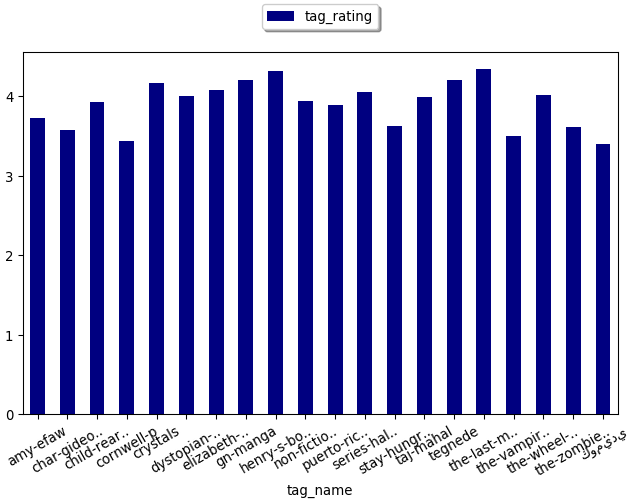

In [36]:
display(tags_ratings_names)